In [2]:
# Install pycaret
# pip install pycaret

In [2]:
# Get data
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [5]:
diabetes.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable'],
      dtype='object')

In [8]:
# Set up environment i.e import relevant module and initialize set up
from pycaret.classification import *
exp1 = setup(diabetes,
             target = 'Class variable',
            numeric_features = ['Number of times pregnant'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7876
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
#Compare models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.761500,0.000000,0.544700,0.705100,0.612000,0.444500
1,Linear Discriminant Analysis,0.757800,0.798700,0.550000,0.691400,0.610500,0.438600
2,Logistic Regression,0.756000,0.797700,0.539800,0.695000,0.603800,0.432500
3,Extreme Gradient Boosting,0.743000,0.813200,0.582500,0.646700,0.611200,0.420300
4,K Neighbors Classifier,0.741200,0.748500,0.588300,0.637100,0.610200,0.417500
5,Ada Boost Classifier,0.741200,0.775100,0.576900,0.647700,0.608300,0.416200
6,CatBoost Classifier,0.741100,0.803900,0.550300,0.655600,0.595500,0.407800
7,Gradient Boosting Classifier,0.737400,0.800700,0.566100,0.640300,0.599900,0.405600
8,Decision Tree Classifier,0.726100,0.705300,0.636300,0.606100,0.618000,0.405600
9,Light Gradient Boosting Machine,0.716800,0.781100,0.534200,0.609900,0.567800,0.358900


In [9]:
# Create model
decision_tree = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.7180,0.5789,0.6875,0.6286,0.4524
1,0.7593,0.7662,0.7895,0.6250,0.6977,0.5021
2,0.7222,0.7135,0.6842,0.5909,0.6341,0.4122
3,0.6481,0.6203,0.5263,0.5000,0.5128,0.2377
4,0.8333,0.8113,0.7368,0.7778,0.7568,0.6301
5,0.7407,0.7158,0.6316,0.6316,0.6316,0.4316
6,0.6852,0.6489,0.5263,0.5556,0.5405,0.3014
7,0.6792,0.6627,0.6111,0.5238,0.5641,0.3127
8,0.7547,0.7198,0.6111,0.6471,0.6286,0.4457
9,0.6792,0.6762,0.6667,0.5217,0.5854,0.3301


In [16]:
# Tune model
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6852,0.7812,0.3158,0.6000,0.4138,0.2260
1,0.7963,0.8556,0.5789,0.7857,0.6667,0.5248
2,0.7222,0.8060,0.4211,0.6667,0.5161,0.3350
3,0.6667,0.7489,0.3158,0.5455,0.4000,0.1913
4,0.7037,0.8256,0.2632,0.7143,0.3846,0.2408
5,0.7037,0.7105,0.2105,0.8000,0.3333,0.2188
6,0.6852,0.7128,0.4737,0.5625,0.5143,0.2839
7,0.6981,0.6667,0.3889,0.5833,0.4667,0.2677
8,0.7170,0.7183,0.4444,0.6154,0.5161,0.3234
9,0.7736,0.8111,0.3889,0.8750,0.5385,0.4165


# Ensemble trained dt model

In [23]:
dt_bagged = ensemble_model(decision_tree)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8148,0.8436,0.5789,0.8462,0.6875,0.5624
1,0.7778,0.8639,0.6316,0.7059,0.6667,0.5008
2,0.7222,0.7940,0.5263,0.6250,0.5714,0.3682
3,0.6481,0.7053,0.4737,0.5000,0.4865,0.2192
4,0.6296,0.7970,0.3158,0.4615,0.3750,0.1248
5,0.7407,0.7421,0.4211,0.7273,0.5333,0.3710
6,0.7222,0.7429,0.4737,0.6429,0.5455,0.3520
7,0.6226,0.6222,0.2778,0.4167,0.3333,0.0846
8,0.6038,0.7476,0.3333,0.4000,0.3636,0.0794
9,0.6792,0.7881,0.3333,0.5455,0.4138,0.2103


# Model Evaluation

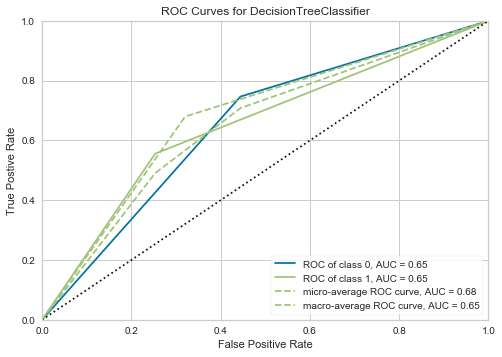

In [24]:
# AUC plot
plot_model(decision_tree, plot = 'auc')

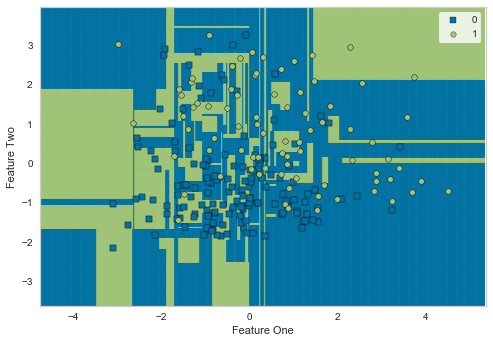

In [25]:
# Decision boundary
plot_model(decision_tree, plot = 'boundary')

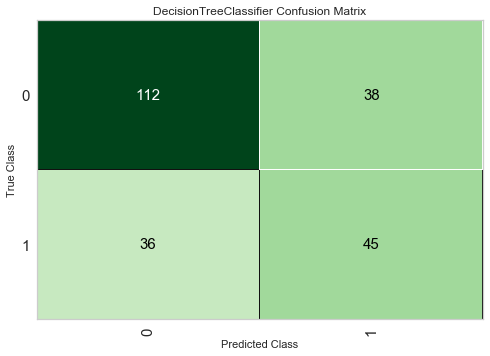

In [29]:
# confusion_matrix
plot_model(decision_tree, plot = 'confusion_matrix')

In [30]:
# Evaluate
evaluate_model(decision_tree)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

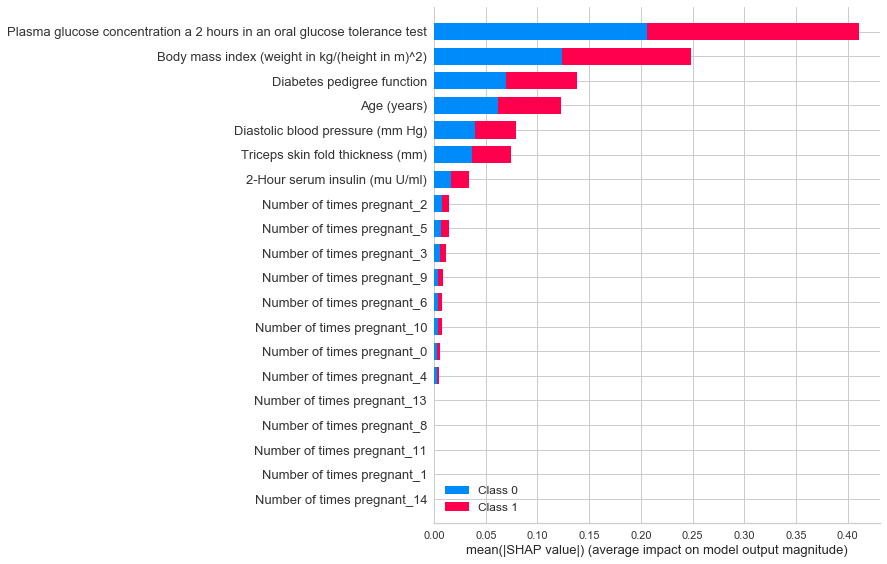

In [31]:
# Inteprete
interpret_model(decision_tree)

In [34]:
interpret_model(decision_tree, plot = 'reason', observation = 4)

In [35]:
# Predict using the test data
predict_model(decision_tree)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.6797,0.6511,0.5556,0.5422,0.5488,0.3005


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,161.0,50.0,0.0,0.0,21.9,0.254,65.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0
1,107.0,68.0,19.0,0.0,26.5,0.165,24.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2,163.0,72.0,0.0,0.0,39.0,1.222,33.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
3,90.0,70.0,17.0,0.0,27.3,0.085,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,139.0,62.0,17.0,210.0,22.1,0.207,21.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,111.0,90.0,12.0,78.0,28.4,0.495,29.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
227,115.0,98.0,0.0,0.0,24.0,1.022,34.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
228,187.0,50.0,33.0,392.0,33.9,0.826,34.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0
229,110.0,76.0,0.0,0.0,27.8,0.237,58.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0


In [36]:
# predict using unseen data. For now we will use the same training data
predict_model(decision_tree, data = diabetes)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1,1.0
3,1,89,66,23,94,28.1,0.167,21,0,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.0
764,2,122,70,27,0,36.8,0.340,27,0,0,0.0
765,5,121,72,23,112,26.2,0.245,30,0,0,0.0
766,1,126,60,0,0,30.1,0.349,47,1,1,1.0


# Save Model

In [39]:
#Save Model for deployment
save_model(decision_tree, model_name = 'aws_decison_tree')

Transformation Pipeline and Model Succesfully Saved


In [41]:
# You can choose to save the entire experiment with output as one binary file
save_experiment(experiment_name = 'my_first_experiment')

Experiment Succesfully Saved


# Deploy Model

In [38]:
# You can deploy the model for real time or batch predictions on cloud platforms
deploy_model(model = decision_tree, model_name = 'aws_decision_tree', platform = 'aws', authentication = {'bucket' : 'pycaret_test'})